# RQ1: Impact of LLMs

- [Vanilla](#vanilla)
- [Few-shot learning](#few-shot-learning)
- [RAG](#rag)
- [Baseline](#baseline)
- [Fine-tuning](#fine-tuning)
- [Effectiveness on Large Test Suite](#effectiveness-on-large-test-suite)

In [2]:
import os
import pandas as pd
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
)
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import numpy as np

In [3]:
EXPERIMENT_RESULTS_PATH = "../AutonomicTester/experiment_results"
LABELS = ["similar", "fixed", "buggy"]
FORMAL_LABELS = ["already-tested", "need-test", "error-prone"]
LARGE_TEST_SUITE_PATH = "plotdata/large_test_suite.csv"

In [ ]:
plt.rcParams.update({"text.usetex": True, "font.family": "Times New Roman"})

In [4]:
def compute_metrics(y_true: list, y_pred: list):
    precision = precision_score(
        y_true, y_pred, labels=LABELS, average=None, zero_division=0
    )
    recall = recall_score(y_true, y_pred, labels=LABELS, average=None, zero_division=0)
    f1 = f1_score(y_true, y_pred, labels=LABELS, average=None, zero_division=0)
    not_yet_tested_f1 = f1[1:].mean()
    avg_f1 = f1_score(y_true, y_pred, labels=LABELS, average="macro", zero_division=0)

    print(
        " | ".join(
            [f"{l}(P R F1)" for l in FORMAL_LABELS]
            + ["not-yet-tested F1", "Total Average F1"]
        )
    )
    print(
        " & ".join(
            [
                " & ".join([f"{precision[i]:.2f}", f"{recall[i]:.2f}", f"{f1[i]:.2f}"])
                for i in range(len(LABELS))
            ]
            + [f"{not_yet_tested_f1:.2f}", f"{avg_f1:.2f}"]
        )
    )
    f1_scores = {label: f1[i] for i, label in enumerate(FORMAL_LABELS)}
    f1_scores["not-yet-tested"] = not_yet_tested_f1
    f1_scores["total average"] = avg_f1
    metrics = {
        "precision": precision,
        "recall": recall,
        "f1": f1_scores,
    }
    return metrics


def summarize_metrics(llm_folder: str):
    """
    Summarize metrics about effectiveness for a specific LLM.

    Parameters
    ----------
    llm_folder: str
       folder name of experiments for a specific LLM
    """
    print("Summary Metrics of Experiment at", llm_folder)
    model_experiments_path = os.path.join(EXPERIMENT_RESULTS_PATH, llm_folder)
    classification_df_path = os.path.join(
        model_experiments_path, "scenario_classification.csv"
    )
    y_true = []
    y_pred = []
    if os.path.exists(classification_df_path):
        df_exp = pd.read_csv(classification_df_path)
        y_true = df_exp["target_scenario"].to_list()
        y_pred = df_exp["classified_scenario"].to_list()
    else:
        for experiment in os.listdir(model_experiments_path):
            experiment_path = os.path.join(model_experiments_path, experiment)
            # Skip not directories
            if not os.path.isdir(experiment_path):
                continue
            true_scenario = experiment.split("_")[-1]
            # Read statistics
            df_votes = pd.read_csv(os.path.join(experiment_path, "scenario_votes.csv"))
            df_votes["truth"] = true_scenario
            y_pred += df_votes["scenario"].to_list()
            y_true += df_votes["truth"].to_list()
    return compute_metrics(y_true, y_pred)

## Vanilla

In [4]:
summarize_metrics("vanilla/Llama3 8B")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.26 & 0.19 & 0.22 & 0.36 & 0.51 & 0.42 & 0.36 & 0.27 & 0.31 & 0.37 & 0.32
avg_precision: 0.32, avg_recall: 0.33


In [5]:
summarize_metrics("vanilla/Llama3 70B")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.18 & 0.29 & 0.22 & 0.34 & 0.28 & 0.31 & 0.28 & 0.19 & 0.23 & 0.27 & 0.25
avg_precision: 0.27, avg_recall: 0.25


In [6]:
summarize_metrics("vanilla/GPT3.5Turbo")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.26 & 0.10 & 0.15 & 0.35 & 0.64 & 0.46 & 0.36 & 0.23 & 0.28 & 0.37 & 0.30
avg_precision: 0.33, avg_recall: 0.33


In [7]:
summarize_metrics("vanilla/GPT4Turbo")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.17 & 0.20 & 0.18 & 0.34 & 0.56 & 0.42 & 0.31 & 0.07 & 0.11 & 0.26 & 0.24
avg_precision: 0.27, avg_recall: 0.28


In [8]:
summarize_metrics("vanilla/GPT4o")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.19 & 0.33 & 0.24 & 0.32 & 0.38 & 0.35 & 0.37 & 0.10 & 0.16 & 0.25 & 0.25
avg_precision: 0.29, avg_recall: 0.27


## Few-shot learning

In [9]:
summarize_metrics("fewshot/GPT4Turbo 3shots")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.19 & 0.24 & 0.21 & 0.35 & 0.52 & 0.42 & 0.32 & 0.09 & 0.14 & 0.28 & 0.26
avg_precision: 0.28, avg_recall: 0.28


In [10]:
summarize_metrics("fewshot/GPT4Turbo 6shots")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.15 & 0.19 & 0.17 & 0.35 & 0.55 & 0.43 & 0.32 & 0.08 & 0.13 & 0.28 & 0.24
avg_precision: 0.27, avg_recall: 0.27


In [11]:
summarize_metrics("fewshot/GPT4Turbo 9shots")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.17 & 0.24 & 0.20 & 0.34 & 0.54 & 0.42 & 0.30 & 0.04 & 0.07 & 0.24 & 0.23
avg_precision: 0.27, avg_recall: 0.27


## RAG

In [12]:
summarize_metrics("rag/Llama3 8B")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.23 & 0.28 & 0.26 & 0.43 & 0.51 & 0.47 & 0.53 & 0.37 & 0.44 & 0.45 & 0.39
avg_precision: 0.40, avg_recall: 0.39


In [13]:
summarize_metrics("rag/Llama3 70B")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.22 & 0.51 & 0.30 & 0.34 & 0.22 & 0.27 & 0.62 & 0.32 & 0.42 & 0.35 & 0.33
avg_precision: 0.39, avg_recall: 0.35


In [14]:
summarize_metrics("rag/GPT3.5Turbo")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.19 & 0.08 & 0.11 & 0.42 & 0.71 & 0.53 & 0.60 & 0.40 & 0.48 & 0.50 & 0.37
avg_precision: 0.40, avg_recall: 0.40


In [15]:
summarize_metrics("rag/GPT4Turbo")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.15 & 0.34 & 0.21 & 0.31 & 0.33 & 0.32 & 0.55 & 0.11 & 0.19 & 0.25 & 0.24
avg_precision: 0.34, avg_recall: 0.26


In [16]:
summarize_metrics("rag/DeepseekR1 70B")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.18 & 0.29 & 0.22 & 0.29 & 0.24 & 0.26 & 0.52 & 0.45 & 0.48 & 0.37 & 0.32
avg_precision: 0.33, avg_recall: 0.32


## Baseline
Random classifier with equal probability for predicting each scenario.

In [53]:
dummy_clf = DummyClassifier(strategy="uniform")
X = list(range(1975))
y_true = ["buggy"] * 719 + ["fixed"] * 719 + ["similar"] * 537
dummy_clf.fit(X, y_true)
all_y_pred = []
all_y_true = []
for _ in range(10):
    y_pred = dummy_clf.predict(X)
    all_y_pred += y_pred.tolist()
    all_y_true += y_true
compute_metrics(all_y_true, all_y_pred)

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.27 & 0.33 & 0.30 & 0.35 & 0.33 & 0.34 & 0.37 & 0.33 & 0.35 & 0.34 & 0.33
avg_precision: 0.33, avg_recall: 0.33


## Fine-tuning
- E-Test
- E-Test RAG

In [17]:
summarize_metrics("finetuning/FineTunedGPT3.5Turbo")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.66 & 0.94 & 0.78 & 0.47 & 0.24 & 0.31 & 0.48 & 0.57 & 0.53 & 0.42 & 0.54
avg_precision: 0.54, avg_recall: 0.58


In [18]:
summarize_metrics("rag/FineTunedGPT3.5Turbo")

already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.47 & 0.41 & 0.44 & 0.51 & 0.61 & 0.56 & 0.52 & 0.46 & 0.49 & 0.52 & 0.50
avg_precision: 0.50, avg_recall: 0.50


### Temperature

In [5]:
def analyze_temperature_experiments() -> dict:
    temperature_experiments = {}
    target_path = os.path.join(EXPERIMENT_RESULTS_PATH, "temperature")
    for model_folder in os.listdir(target_path):
        model_path = os.path.join(target_path, model_folder)
        if not os.path.isdir(model_path):
            continue
        temperature_experiments[model_folder] = {}
        for repetition_folder in os.listdir(model_path):
            repetition_path = os.path.join(model_path, repetition_folder)
            if not os.path.isdir(repetition_path):
                continue
            temperature_experiments[model_folder][repetition_folder] = {}
            for temperature_folder in os.listdir(repetition_path):
                temperature_path = os.path.join(repetition_path, temperature_folder)
                if not os.path.isdir(temperature_path):
                    continue
                # read predictions and ground truths
                y_true = []
                y_pred = []
                if model_folder == "E-Test":
                    for experiment in os.listdir(temperature_path):
                        experiment_path = os.path.join(temperature_path, experiment)
                        # Skip not directories
                        if not os.path.isdir(experiment_path):
                            continue
                        df_exp = pd.read_csv(
                            os.path.join(experiment_path, "scenario_votes.csv")
                        )
                        y_true += df_exp["truth"].to_list()
                        y_pred += df_exp["scenario"].to_list()
                    if y_true == [] and y_pred == []:
                        df_exp = pd.read_csv(
                            os.path.join(temperature_path, "scenario_votes.csv")
                        )
                        y_true += df_exp["truth"].to_list()
                        y_pred += df_exp["scenario"].to_list()
                else:
                    df_exp = pd.read_csv(
                        os.path.join(temperature_path, "scenario_votes.csv")
                    )
                    y_true += df_exp["truth"].to_list()
                    y_pred += df_exp["scenario"].to_list()
                # compute metrics
                print(model_folder, repetition_folder, temperature_folder)
                temperature_experiments[model_folder][repetition_folder][
                    temperature_folder
                ] = compute_metrics(y_true, y_pred)
    return temperature_experiments

In [6]:
temperature_experiments = analyze_temperature_experiments()

Deepseek R1 70B repetition1 t1.5
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.26 & 0.31 & 0.28 & 0.36 & 0.20 & 0.26 & 0.38 & 0.50 & 0.43 & 0.34 & 0.32
Deepseek R1 70B repetition1 t2
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.27 & 0.32 & 0.29 & 0.37 & 0.21 & 0.27 & 0.40 & 0.52 & 0.45 & 0.36 & 0.33
Deepseek R1 70B repetition1 t0.75
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.24 & 0.27 & 0.25 & 0.31 & 0.16 & 0.22 & 0.39 & 0.54 & 0.46 & 0.34 & 0.31
Deepseek R1 70B repetition1 t0
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.25 & 0.30 & 0.28 & 0.31 & 0.14 & 0.20 & 0.38 & 0.53 & 0.44 & 0.32 & 0.31
Deepseek R1 70B repetition3 t1.5
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.26 & 0.64 & 0.37

In [15]:
def print_tabular_metrics(temperature_experiments: dict, llm: str, temperature: float):
    repetition1 = temperature_experiments[llm]["repetition1"][f"t{temperature}"]
    repetition2 = temperature_experiments[llm]["repetition2"][f"t{temperature}"]
    repetition3 = temperature_experiments[llm]["repetition3"][f"t{temperature}"]
    precision = [
        np.mean(
            [
                repetition1["precision"][i],
                repetition2["precision"][i],
                repetition3["precision"][i],
            ]
        )
        for i in range(len(FORMAL_LABELS))
    ]
    print(f"average precision {np.mean(precision):.2f}")
    recall = [
        np.mean(
            [
                repetition1["recall"][i],
                repetition2["recall"][i],
                repetition3["recall"][i],
            ]
        )
        for i in range(len(FORMAL_LABELS))
    ]
    print(f"average recall {np.mean(recall):.2f}")
    f1 = {
        k: np.mean([repetition1["f1"][k], repetition2["f1"][k], repetition3["f1"][k]])
        for k in FORMAL_LABELS + ["not-yet-tested", "total average"]
    }
    # print(
    #     " | ".join(
    #         [f"{l}(P R F1)" for l in FORMAL_LABELS]
    #         + ["not-yet-tested F1", "Total Average F1"]
    #     )
    # )
    print(
        " & ".join(
            [rf"\review{{{llm}}}"]
            + [
                " & ".join(
                    [
                        rf"\review{{{precision[i]:.2f}}}",
                        rf"\review{{{recall[i]:.2f}}}",
                        rf"\review{{{f1[FORMAL_LABELS[i]]:.2f}}}",
                    ]
                )
                for i in range(len(FORMAL_LABELS))
            ]
            + [
                rf"\review{{{f1['not-yet-tested']:.2f}}}",
                rf"\review{{{f1['total average']:.2f}}}",
            ]
        )
    )

In [13]:
print_tabular_metrics(temperature_experiments, "Llama3 1B", 0.75)
print_tabular_metrics(temperature_experiments, "Llama3 3B", 0.75)
print_tabular_metrics(temperature_experiments, "Deepseek R1 1.5B", 0.75)
print_tabular_metrics(temperature_experiments, "Deepseek R1 7B", 0.75)
print_tabular_metrics(temperature_experiments, "Deepseek R1 14B", 0.75)
print_tabular_metrics(temperature_experiments, "Deepseek R1 32B", 0.75)
print_tabular_metrics(temperature_experiments, "Deepseek R1 70B", 0.75)

\review{Llama3 1B} & \review{0.29} & \review{0.80} & \review{0.43} & \review{0.39} & \review{0.11} & \review{0.17} & \review{0.40} & \review{0.16} & \review{0.22} & \review{0.19} & \review{0.27}
\review{Llama3 3B} & \review{0.20} & \review{0.00} & \review{0.00} & \review{0.36} & \review{0.33} & \review{0.34} & \review{0.37} & \review{0.68} & \review{0.48} & \review{0.41} & \review{0.28}
\review{Deepseek R1 1.5B} & \review{0.27} & \review{0.49} & \review{0.35} & \review{0.35} & \review{0.19} & \review{0.24} & \review{0.38} & \review{0.33} & \review{0.35} & \review{0.30} & \review{0.31}
\review{Deepseek R1 7B} & \review{0.18} & \review{0.12} & \review{0.14} & \review{0.36} & \review{0.44} & \review{0.39} & \review{0.36} & \review{0.40} & \review{0.38} & \review{0.38} & \review{0.30}
\review{Deepseek R1 14B} & \review{0.31} & \review{0.51} & \review{0.37} & \review{0.41} & \review{0.21} & \review{0.27} & \review{0.38} & \review{0.38} & \review{0.38} & \review{0.32} & \review{0.34}
\review

In [16]:
print_tabular_metrics(temperature_experiments, "E-Test", 2)

average precision 0.55
average recall 0.59
\review{E-Test} & \review{0.67} & \review{0.94} & \review{0.78} & \review{0.49} & \review{0.26} & \review{0.34} & \review{0.49} & \review{0.58} & \review{0.53} & \review{0.43} & \review{0.55}


In [251]:
llm_map = {
    "Llama3": ["Llama3 1B", "Llama3 3B", "Llama3 8B", "Llama3 70B"],
    "Deepseek R1": [
        "Deepseek R1 1.5B",
        "Deepseek R1 7B",
        "Deepseek R1 14B",
        "Deepseek R1 32B",
        "Deepseek R1 70B",
    ],
}

In [ ]:
def draw_avgf1_with_temperature(
    temperature_experiments: dict, f1_name: str, llm_family_name: str
):
    llm_family = llm_map[llm_family_name]
    ylabels = {
        "total average": "Avg. F1-score",
        "error-prone": r"F1-score of \textit{error-prone}",
        "need-test": r"F1-score of \textit{need-test}",
        "already-tested": r"F1-score of \textit{already-tested}",
        "not-yet-tested": r"F1-score of \textit{not-yet-tested}",
    }
    markers = ["o", "v", "s", "p", "*", "D"]
    marker_sizes = [7, 7, 7, 9, 10, 7]
    cmap = plt.get_cmap("tab10")
    colors = [cmap(i) for i in range(len(temperature_experiments))]
    fig, ax = plt.subplots(figsize=(8, 4))
    temperatures = [0, 0.75, 1.5, 2]  # temperatures of LLMs
    for index, model in enumerate(["E-Test"] + llm_family):
        repetitions = temperature_experiments[model]
        # aggregate f1 scores
        min_f1_scores = []
        avg_f1_scores = []
        max_f1_scores = []
        stds = []
        for temp in temperatures:
            f1_scores = [
                repetitions[rep_index][f"t{temp}"]["f1"][f1_name]
                for rep_index in ["repetition1", "repetition2", "repetition3"]
            ]
            stds.append(np.std(f1_scores))
            min_f1_scores.append(min(f1_scores))
            avg_f1_scores.append(np.mean(f1_scores))
            max_f1_scores.append(max(f1_scores))
        # plot
        ax.plot(
            temperatures,
            avg_f1_scores,
            marker=markers[index],
            markersize=marker_sizes[index],
            color=colors[index],
            label=model,
        )
        print(model)
        print("Avg. F1", ", ".join(["%.2f" % v for v in avg_f1_scores]))
        print("Std", ", ".join(["%.2f" % v for v in stds]))
        print(
            "Across temperatures",
            "%.2f" % np.mean(avg_f1_scores),
            "%.2f" % np.std(avg_f1_scores),
        )
        if model == "E-Test":
            ax.fill_between(
                temperatures,
                min_f1_scores,
                max_f1_scores,
                color=colors[index],
                alpha=0.3,
            )
        ax.set_ylim(0, 1)
        ax.set_xticks(temperatures)
        ax.tick_params(axis="both", labelsize=16)
        ax.set_xlabel("Temperature", fontsize=16)
        ax.set_ylabel(ylabels[f1_name], fontsize=16)
        ax.legend(ncol=2, fontsize=16)
        fig.savefig(
            f"images/inverse_scaling_by_temperature_{llm_family_name}_{f1_name}.pdf",
            bbox_inches="tight",
        )
        # fig.savefig(
        #     f"images/inverse_scaling_by_temperature_{llm_family_name}_{f1_name}.png",
        #     bbox_inches="tight",
        # )

E-Test
Avg. F1 0.46, 0.51, 0.54, 0.55
Std 0.00, 0.01, 0.01, 0.01
Across temperatures 0.52 0.03
Deepseek R1 1.5B
Avg. F1 0.30, 0.31, 0.31, 0.30
Std 0.00, 0.01, 0.01, 0.00
Across temperatures 0.31 0.01
Deepseek R1 7B
Avg. F1 0.29, 0.30, 0.31, 0.31
Std 0.00, 0.01, 0.01, 0.01
Across temperatures 0.30 0.01
Deepseek R1 14B
Avg. F1 0.26, 0.34, 0.34, 0.33
Std 0.04, 0.01, 0.01, 0.01
Across temperatures 0.32 0.03
Deepseek R1 32B
Avg. F1 0.28, 0.30, 0.30, 0.30
Std 0.04, 0.03, 0.04, 0.03
Across temperatures 0.30 0.01
Deepseek R1 70B
Avg. F1 0.23, 0.25, 0.27, 0.28
Std 0.05, 0.04, 0.05, 0.05
Across temperatures 0.26 0.02


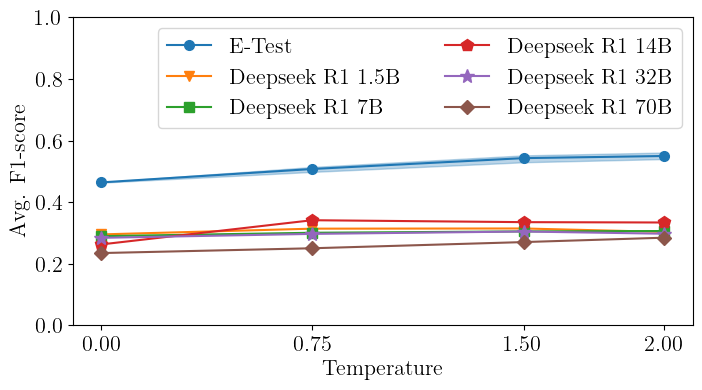

In [270]:
draw_avgf1_with_temperature(temperature_experiments, "total average", "Deepseek R1")

E-Test
Avg. F1 0.46, 0.51, 0.54, 0.55
Std 0.00, 0.01, 0.01, 0.01
Across temperatures 0.52 0.03
Llama3 1B
Avg. F1 0.30, 0.27, 0.28, 0.29
Std 0.00, 0.03, 0.02, 0.02
Across temperatures 0.28 0.01
Llama3 3B
Avg. F1 0.28, 0.28, 0.28, 0.28
Std 0.00, 0.00, 0.00, 0.00
Across temperatures 0.28 0.00
Llama3 8B
Avg. F1 0.28, 0.32, 0.28, 0.28
Std 0.00, 0.00, 0.01, 0.01
Across temperatures 0.29 0.01
Llama3 70B
Avg. F1 0.21, 0.25, 0.22, 0.22
Std 0.00, 0.00, 0.01, 0.01
Across temperatures 0.23 0.02


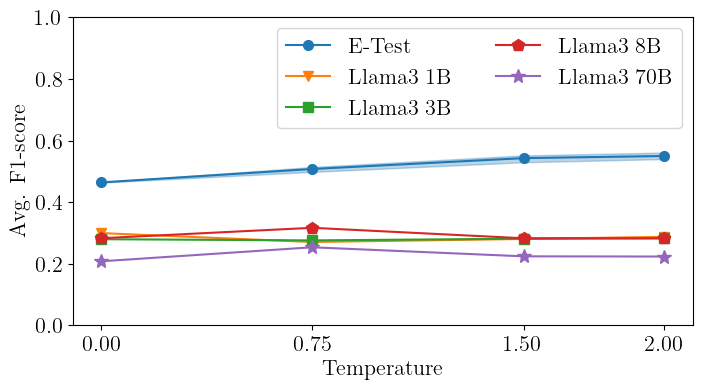

In [260]:
draw_avgf1_with_temperature(temperature_experiments, "total average", "Llama3")

## Effectiveness on Large Test Suite

In [54]:
TEST_SUITE_STATS_PATH = "plotdata/test_suite_stats.jsonl"
FILTERED_SCENARIOS_PATH = "plotdata/filtered_scenarios.csv"

In [55]:
df_filtered_scenarios = pd.read_csv(FILTERED_SCENARIOS_PATH)
df_test_suite_stats = pd.read_json(TEST_SUITE_STATS_PATH, lines=True)
df_test_suite_stats["bug"] = df_test_suite_stats["bug"].astype(int)

In [56]:
index_columns = ["project", "bug", "scenario_index"]
df_ts = df_filtered_scenarios.set_index(index_columns).join(
    df_test_suite_stats.set_index(index_columns), how="left"
)

In [57]:
df_ts

buggy_class  \
project bug scenario_index                                                      
Chart   1   0               org.jfree.chart.renderer.category.AbstractCate...   
        2   1                         org.jfree.data.general.DatasetUtilities   
        3   0                                  org.jfree.data.time.TimeSeries   
        4   13                                    org.jfree.chart.plot.XYPlot   
        5   0                                      org.jfree.data.xy.XYSeries   
...                                                                       ...   
Time    23  0                                      org.joda.time.DateTimeZone   
        24  6                       org.joda.time.format.DateTimeParserBucket   
        25  0                                      org.joda.time.DateTimeZone   
        26  21                           org.joda.time.chrono.ZonedChronology   
        27  0                     org.joda.time.format.PeriodFormatterBuilder   

                                                                 buggy_method  \
project bug scenario_index                                                      
Chart   1   0               org.jfree.chart.renderer.category.AbstractCate...   
        2   1               org.jfree.data.general.DatasetUtilities.iterat...   
        3   0               org.jfree.data.time.TimeSeries.createCopy(int,...   
        4   13              org.jfree.chart.plot.XYPlot.getDataRange(org.j...   
        5   0               org.jfree.data.xy.XYSeries.addOrUpdate(java.la...   
...                                                                       ...   
Time    23  0               org.joda.time.DateTimeZone.getConvertedId(java...   
        24  6               org.joda.time.format.DateTimeParserBucket.comp...   
        25  0               org.joda.time.DateTimeZone.getOffsetFromLocal(...   
        26  21              org.joda.time.chrono.ZonedChronology.ZonedDate...   
        27  0               org.joda.time.format.PeriodFormatterBuilder.to...   

                                                              test_suite_name  \
project bug scenario_index                                                      
Chart   1   0               org.jfree.chart.renderer.category.junit.Abstra...   
        2   1               org.jfree.data.general.junit.DatasetUtilitiesT...   
        3   0                       org.jfree.data.time.junit.TimeSeriesTests   
        4   13                         org.jfree.chart.junit.XYAreaChartTests   
        5   0                           org.jfree.data.xy.junit.XYSeriesTests   
...                                                                       ...   
Time    23  0                                  org.joda.time.TestDateTimeZone   
        24  6                      org.joda.time.format.TestDateTimeFormatter   
        25  0                           org.joda.time.TestDateTimeZoneCutover   
        26  21                          org.joda.time.TestDateTimeZoneCutover   
        27  0                 org.joda.time.format.TestPeriodFormatterBuilder   

                            test_case_count  num_chars  num_gpt_tokens  \
project bug scenario_index                                               
Chart   1   0                             9      10287            2181   
        2   1                            52      36773            9669   
        3   0                            36      28126            7136   
        4   13                            0       1743             400   
        5   0                            20      11121            3185   
...                                     ...        ...             ...   
Time    23  0                            41      33700            7128   
        24  6                            50      33424            9832   
        25  0                           111      55088           18392   
        26  21                          100      48136           16416   
        27  0   

In [58]:
count_exceed_context_limit = len(df_ts[df_ts["num_gpt_tokens"] > 16385])
percentage_exceed_context_limit = 100 * count_exceed_context_limit / len(df_ts)
print(
    f"{percentage_exceed_context_limit:.2f}% scenarios include test suite size longer than 8K tokens, which exceeds the limit when building raw prompts"
)

6.59% scenarios include test suite size longer than 8K tokens, which exceeds the limit when building raw prompts


In [64]:
df_rag = df_ts[df_ts["num_gpt_tokens"] > 16385]

In [65]:
df_rag.index.to_frame().to_csv("plotdata/large_test_suite.csv", index=False)

In [72]:
def compare_rag_improvement_over_large_test_suite(model: str):
    df_rag_exp = pd.read_csv(
        os.path.join(
            EXPERIMENT_RESULTS_PATH, "rag", model, "scenario_classification.csv"
        )
    )
    df_large_test_suite = pd.read_csv(LARGE_TEST_SUITE_PATH)[["project", "bug"]]
    # Read dataframe of experiment without RAG
    model_experiments_path = os.path.join(EXPERIMENT_RESULTS_PATH, "vanilla", model)
    exp_without_rag = []
    for experiment in os.listdir(model_experiments_path):
        experiment_path = os.path.join(
            model_experiments_path, experiment, "scenario_votes.csv"
        )
        true_scenario = experiment.split("_")[-1]
        df_exp = pd.read_csv(experiment_path)
        df_exp["target_scenario"] = true_scenario
        exp_without_rag.append(df_exp)
    df_exp_without_rag = pd.concat(exp_without_rag)
    df_exp_without_rag = df_exp_without_rag.rename(
        columns={"bug id": "bug", "scenario": "classified_scenario"}
    )[["project", "bug", "classified_scenario", "target_scenario"]]
    # Read dataframe of experiment with RAG
    df_exp_with_rag = df_rag_exp[
        ["project", "bug", "classified_scenario", "target_scenario"]
    ]
    # Filtered dataframe on large test suite
    df_exp_with_rag_large_ts = (
        df_large_test_suite.set_index(["project", "bug"])
        .join(df_exp_with_rag.set_index(["project", "bug"]))
        .reset_index()
    )
    df_exp_without_rag_large_ts = (
        df_large_test_suite.set_index(["project", "bug"])
        .join(df_exp_without_rag.set_index(["project", "bug"]))
        .reset_index()
    )
    print("With RAG")
    compute_metrics(
        df_exp_with_rag_large_ts["target_scenario"].tolist(),
        df_exp_with_rag_large_ts["classified_scenario"].tolist(),
    )
    print("\nWithout RAG")
    compute_metrics(
        df_exp_without_rag_large_ts["target_scenario"].tolist(),
        df_exp_without_rag_large_ts["classified_scenario"].tolist(),
    )

In [73]:
compare_rag_improvement_over_large_test_suite("Llama3 8B")

With RAG
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.35 & 0.52 & 0.42 & 0.55 & 0.52 & 0.54 & 0.64 & 0.50 & 0.56 & 0.55 & 0.50
avg_precision: 0.51, avg_recall: 0.51

Without RAG
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.33 & 0.17 & 0.23 & 0.36 & 0.36 & 0.36 & 0.38 & 0.53 & 0.44 & 0.40 & 0.34
avg_precision: 0.36, avg_recall: 0.35


In [74]:
compare_rag_improvement_over_large_test_suite("Llama3 70B")

With RAG
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.23 & 0.55 & 0.32 & 0.33 & 0.16 & 0.22 & 0.62 & 0.42 & 0.50 & 0.36 & 0.35
avg_precision: 0.39, avg_recall: 0.38

Without RAG
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.14 & 0.25 & 0.18 & 0.33 & 0.23 & 0.27 & 0.22 & 0.13 & 0.17 & 0.22 & 0.21
avg_precision: 0.23, avg_recall: 0.20


In [75]:
compare_rag_improvement_over_large_test_suite("GPT3.5Turbo")

With RAG
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.40 & 0.07 & 0.12 & 0.49 & 0.68 & 0.57 & 0.67 & 0.72 & 0.69 & 0.63 & 0.46
avg_precision: 0.52, avg_recall: 0.49

Without RAG
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.18 & 0.06 & 0.09 & 0.31 & 0.61 & 0.41 & 0.36 & 0.20 & 0.25 & 0.33 & 0.25
avg_precision: 0.29, avg_recall: 0.29


In [76]:
compare_rag_improvement_over_large_test_suite("GPT4Turbo")

With RAG
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.18 & 0.55 & 0.27 & 0.38 & 0.24 & 0.29 & 0.67 & 0.12 & 0.20 & 0.25 & 0.26
avg_precision: 0.41, avg_recall: 0.30

Without RAG
already-tested(P R F1) | need-test(P R F1) | error-prone(P R F1) | not-yet-tested F1 | Total Average F1
0.03 & 0.03 & 0.03 & 0.31 & 0.57 & 0.40 & 0.00 & 0.00 & 0.00 & 0.20 & 0.14
avg_precision: 0.11, avg_recall: 0.20


In [ ]:
def plot_bars_large_test_suite():
    fontsize_paper = 18
    # Settings for plots
    DARK_GREEN = "#1e8449"
    DARK_BLUE = "#2874a6"
    labels = ["Llama3 8B", "Llama3 70B", "GPT-3.5 Turbo", "GPT-4 Turbo"]
    models = ["Llama3 8B", "Llama3 70B", "GPT3.5Turbo", "GPT4Turbo"]
    values_without_rag = [0.34, 0.21, 0.25, 0.14]
    values_with_rag = [0.50, 0.35, 0.46, 0.26]
    width = 0.3
    fig, ax = plt.subplots(tight_layout=True)
    x = np.arange(len(labels))  # X locations for groups
    bars1 = ax.bar(
        x - width / 2,
        values_without_rag,
        width,
        label="prompt without RAG",
        color=DARK_GREEN,
    )
    bars2 = ax.bar(
        x + width / 2,
        values_with_rag,
        width,
        label="prompt with RAG",
        color=DARK_BLUE,
    )
    for i, v in enumerate(values_without_rag):
        if v != 0:
            ax.text(
                x[i] - width / 2,
                v,
                f"{v:.2f}",
                ha="center",
                va="bottom",
                fontsize=fontsize_paper,
            )
    for i, v in enumerate(values_with_rag):
        if v != 0:
            ax.text(
                x[i] + width / 2,
                v,
                f"{v:.2f}",
                ha="center",
                va="bottom",
                fontsize=fontsize_paper,
            )

    # Labels and title
    ax.set_ylabel("Total Avg. F1", fontsize=fontsize_paper)
    ax.set_xticks(x)  # Set ticks at group positions
    ax.set_xticklabels(labels, rotation=35, fontsize=fontsize_paper)  # Set tick labels
    ax.legend(fontsize=fontsize_paper)
    ax.tick_params(axis="y", labelsize=fontsize_paper)
    ax.set_ylim(top=0.8)
    fig.savefig("images/large_test_suite.pdf", bbox_inches="tight")

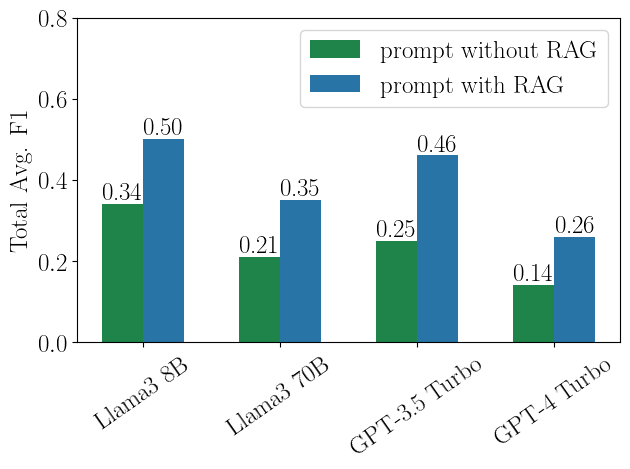

In [84]:
plot_bars_large_test_suite()